# 09.2023 #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #test matplot lib installed to draw plots

#https://docs.google.com/spreadsheets/d/1hjDxZubGKyQTE2bY-i7bevwSU6evxrCGiKW6tnUajhI
source = r'data Библиографический указатель морских узлов by hasp v20 - knots with books.tsv'
knotDf = pd.read_csv(source, sep='\t', skiprows=[0]) #skip credintals
#knotDf = knotDf.rename(columns={'Knot name':'knot_name','тематика':'theme','год':'year','перевод с':'translated_from'})
knotDf.head()

,knot_name,page,sourse,theme,book_type,year,lang,translated,google_books,knot_count,sponsor,date_add
0,?,NaN,"Грумм-Гржимайло, Михаил Ефимович. Вьючное дело...",NaN,NaN,1905,ru,-,NaN,NaN,NaN,NaN
1,?,NaN,Березин Евгений. Морская практика. Ч. 1-2. — С...,судостроение,NaN,1875,ru,-,NaN,NaN,NaN,NaN
2,?,NaN,Чертежи к морской практике Евгения Березина,чертежи,NaN,1875,ru,-,https://kp.rusneb.ru/item/reader/morskaya-prak...,NaN,NaN,NaN
3,?,NaN,Бобрицкий Т.И. Такелажные работы аварийно-спас...,морская наука,NaN,1956,ru,-,NaN,NaN,NaN,NaN
4,?,NaN,Васильев М.В. Морская судовая практика. — Л.: ...,морская наука,NaN,1938,ru,-,NaN,NaN,NaN,NaN


column description // Описание колонок:
- **knot_name** — название узла в книге

- **page** — knot page // страница с узлом в книге

- **sourse** — book // название книги или источника

- **theme** — тематика (ручное заполнение)

- **book_type** — справочник, энциклопедия, учебник..(ручная заполнение, слабо заполнено)

- **year** — год издания (extracted from sourse)

- **lang** — book lang // язык книги

- **translated** — from what lang translated // язык книги с которой был сделан перевод

-  **knot_count** — knot count in book by group by rows

-  **sponsor** — source finder/giver

-  **date_add** — add date to dataset

# filter rows // Почистить данные от бесполезных

In [2]:
#skip without year
#без дат на график не добавить
knotDf = knotDf.query('year != "-"')
#skip hypothetical books with knot
#гипотетические книги убрать
knotDf = knotDf.query('knot_name!="?"')
#date sorting
#для сортировки - даты в число
knotDf['year'] = pd.to_numeric(knotDf['year'])
#remove unused cols 
#колонки не нужные
knotDf = knotDf.drop(columns=['google_books'])
knotDf = knotDf.drop(columns=['page'])
#patents remove
#патенты убрать
knotDf = knotDf.query('book_type!="патент"')
knotDf.head()

,knot_name,sourse,theme,book_type,year,lang,translated,knot_count,sponsor,date_add
25,простои узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-,196.0,zaripov,03.21
26,развязывающийся простой узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-,196.0,zaripov,03.21
27,двойной простой узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-,196.0,zaripov,03.21
28,тройной простои узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-,196.0,zaripov,03.21
29,дубовый узел,Шпаковский М. М. Большая энциклопедия узлов. —...,морские узлы,справочник,2016,ru,-,196.0,zaripov,03.21


# Group By Book to make books single row
# Сгруппировать книги (из-за узлов повторяются)

In [3]:
knotDfGroupedByBook = knotDf.groupby(['sourse']).agg({
    'knot_name':'count', 'year':'first', 'theme':'first', 'book_type':'first', 'lang':'first', 'translated':'first' 
})
knotDfGroupedByBook = knotDfGroupedByBook.rename(columns={'knot_name':'knot_count'})
knotDfGroupedByBook.reset_index(inplace=True)
print('sort by knot_count')
pd.set_option('display.max_rows', 25) ; pd.set_option('max_colwidth', 400)
display(knotDfGroupedByBook.sort_values(by=['knot_count'], ascending=False).reset_index(drop=True).head(15))
#knotDfGroupedByBook.sort_values(by=['knot_count'], ascending=False).reset_index(drop=True).head(30).to_csv("morehod.csv")
print('sort by year')
display(knotDfGroupedByBook.sort_values(by=['year'], ascending=True).reset_index(drop=True).head(15))

sort by knot_count


,sourse,knot_count,year,theme,book_type,lang,translated
0,"Clifford W. Ashley. The Ashley Book of Knots. — New York: Doubleday, 1944. — ISBN 0-385-04025-3",2643,1944,морские узлы,None,en,-
1,"Куряшкин А. Н. Техника вязки узлов. Теория и практика. — Семипалатинск: Семей, 2014. — ISBN 978-601-80497-5-0",560,2014,морские узлы,справочник,ru,-
2,"Чьен В. Книга узлов. 365 простых узлов для декора и медитации. — пер. с англ. Елены Куприяновой. — М.: Манн, Иванов и Фербер, 2021. — 192 c. — ISBN 978-5-00169-559-2",384,2021,морские узлы,None,ru,en
3,"Geoffrey Budworth The Ultimate Encyclopedia of Knots and Ropework: Over 200 Tying Techniques with Step-by-Step Photographs, 2004",275,2004,None,None,en,-
4,"Будворт Джефри. Узлы. Полная энциклопедия. Более 200 способов вязания узлов. — Москва: Эксмо, 2014. — ISBN 978-5-699-68816-6",267,2014,морские узлы,справочник,ru,en
5,HARLES E. GIBSON Handbook of Knots and Splices,260,1961,None,None,en,-
6,"YurikGL. Узлы - история, легенды, виды. — Уфа: библиотека Туристско-Спортивного Союза Республики Башкортостан, 2010.",251,2010,морские узлы,самиздат,ru,-
7,"Des Pawson Handbook of Knots, 2004",221,2004,None,None,en,-
8,"Hyatt Verrill A. Knots, Splices and Rope Work",210,1917,None,None,en,-
9,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,2016,морские узлы,справочник,ru,-


sort by year


,sourse,knot_count,year,theme,book_type,lang,translated
0,"Глотов А.Я. Изъяснения принадлежностей к вооружению корабля. — Спб.: Морской тип., 1816.",11,1816,морская наука,справочник,ru,-
1,"Основания Артиллерийской и Понтонной Науки Часть II. — Военный Ученый Комитет,1816.",6,1816,война,None,ru,-
2,"Наставление для обучения саперных батальонов по искусственной части. — Спб.: тип. Мед. деп. М-ва вн. дел, 1831. [НЕТ АТЛАСА]",45,1831,война,None,ru,-
3,"Учебная книга для нижних чинов учебного морского экипажа приготавливаемых к выпуску во флотские унтер-офицеры. — Спб: Типография главного штаба его императорского величества по военному поселению, 1832.",6,1832,морская наука,None,ru,-
4,"Бутаков А. Словарь морскихъ словъ и реченій, съ англійскаго на французскій и русскій языки. 1837.",17,1837,морская наука,словарь,"ru,fr",en
5,Энциклопедический лексикон. Т14. 1838.,1,1838,None,None,ru,-
6,"Словарь церковно-славянскаго и русскаго языка, составленный Вторым отделением Императорской академии наук, Т4. 1847.",1,1847,None,None,ru,-
7,"Теляковский А. Учебныя руководства для военно-учебных заведенiй. Часть 1. Полевая фортификацiя. — 2-е изд. испр. и доп. — Спб: И.И. Глазунова и Ко, 1848. [черт.16 279]",15,1848,война,None,ru,-
8,Руководство для Артиллерійской службы. — спб.:1853.,6,1853,война,None,ru,None
9,"Шульц В.К. Словарь морских слов и речений парусного и пароходного флота. — Спб.: тип. имп. академии наук, 1853.",9,1853,морская наука,словарь,ru,-


# Баланс данных

## knot book by year // Кол-во книг по годам
График не представляет объективно частоту упоминаний узлов, потому что в датасет добавлялись книги преемущественно с морскими узлами, а макрамешные или рыболовные исключались в виду ресурсных затрат.
Таким образом для использования датасета надо фильтровать данные для балонсировки. Например позже 2014 мало существующих книг в датасете

all book count 344


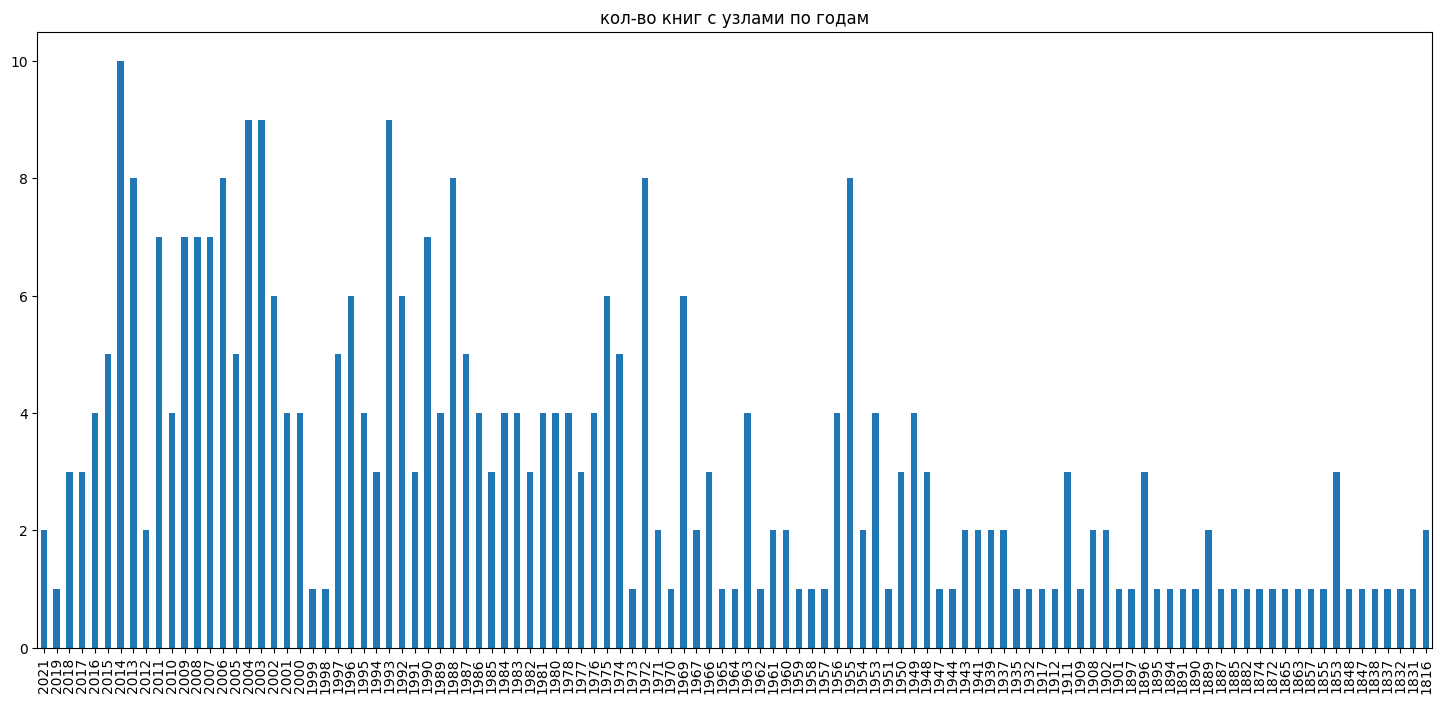

In [4]:
print('all book count', knotDfGroupedByBook.shape[0])

seriesByYear = knotDfGroupedByBook.year.value_counts().sort_index(ascending=False)
seriesByYear.plot.bar(x='year', title='кол-во книг с узлами по годам', rot=90, figsize=(18,8), legend=False)

#small count of new books
#позже 2014 мало существующих книг в датасете
knotDf = knotDf.query('year < 2015')

#кол-во записей по году (сумма узлов со всех книг в году)
#knotDf.year.value_counts()

In [5]:
#empty volues count by cols
#кол-во незаполненных полей
knotDf.isnull().sum()
#помоему, тип книг(справочник, уч. пособие) не имеет какого-то стандарта, поэтому его тяжело заполнять,
#    единственное для чего она нужна это фильтровать "самиздат"
#тематики выдуманны, но заполненны, потому что они разделяют узлы рыболовные и макраме и .. 

knot_name        0
sourse           0
theme         1813
book_type     5751
year             0
lang             0
translated      33
knot_count       0
sponsor          0
date_add         0
dtype: int64

In [6]:
#all themes list
#Тематики книг в датасете. show unique theme to fix dublicates
v = knotDf['theme'].astype(str).unique().tolist()
v.sort()
print(', '.join(v))
#sum(), mean(), median(), min(), max(), first(), count(), last(), std(), var(), prod()

-, 3d, nan, альпинизм, археология, война, галстук, дети, история, кожевничество, криминалистика, лес, макраме, математика, морская наука, морские узлы, орнамент, оружие, охота, педагогика, подводная, рисование, рыболовство, строительство, судостроение, ткачество, туризм, философия, хирургия, худ, эзотерика, этнография, яхтинг


In [7]:
#book count by themes
#кол-во книг в разных тематиках
knotDfGroupedByBook.theme.value_counts()

морские узлы     61
морская наука    57
этнография       26
рыболовство      17
война            13
                 ..
ткачество         1
философия         1
охота             1
рисование         1
лес               1
Name: theme, Length: 33, dtype: int64

In [8]:
#book count by langs
#кол-во книг по языкам
knotDfGroupedByBook.lang.value_counts()
#en книги нет смысла учитывать потому что их мало

ru       321
en        15
ru,en      4
sp         1
sv         1
fr         1
ru,fr      1
Name: lang, dtype: int64

## plot russian books by year. Ru
## График кол-во русских книг о морских узлах по годам ##
    В графике не учитываются некоторые тематики: рыболовные, магические, альпинисткие, макраме потому, что у них совсем другие узлы, ктр не совпадают с морскими. Например узел "фриволите" макрамешный и встречается только в макраме книгах.

    Графики одинаковые просто распределение дат разное — в баре не равномерно

<Axes: xlabel='year'>

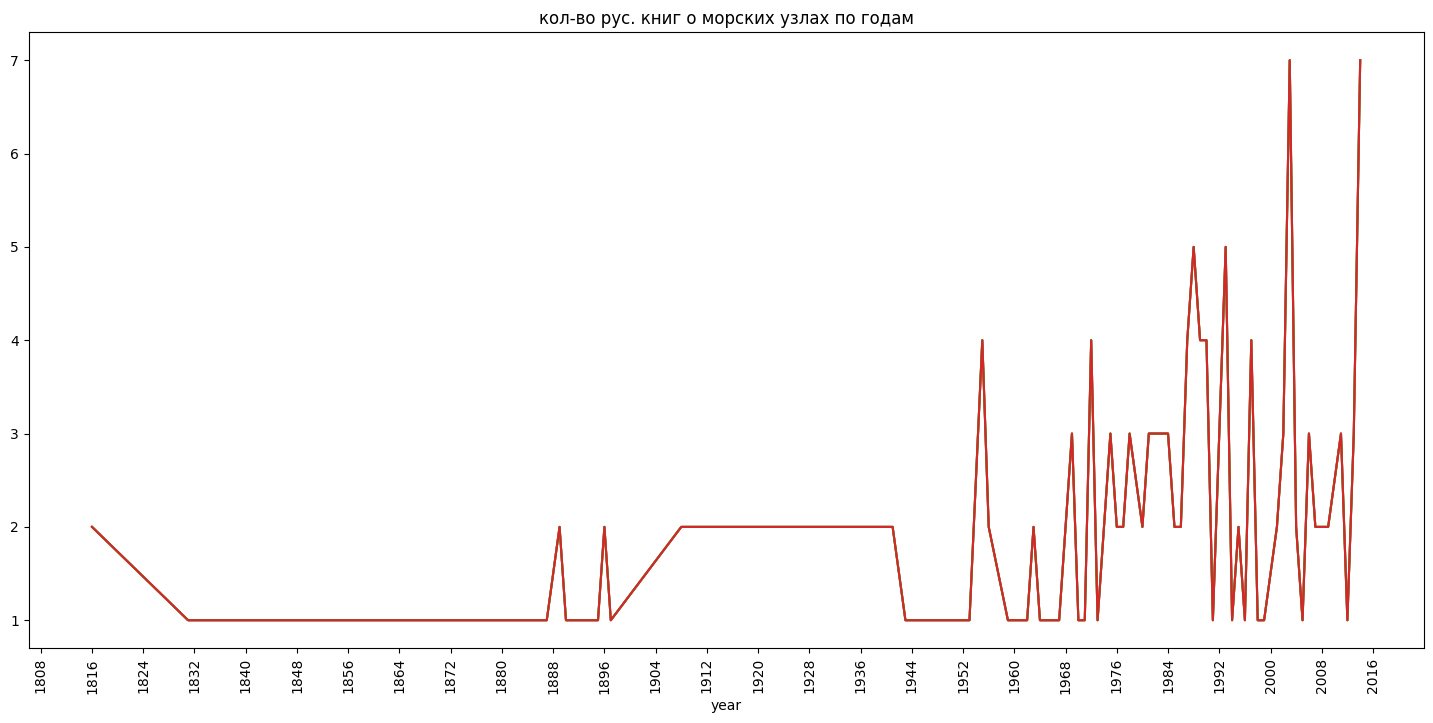

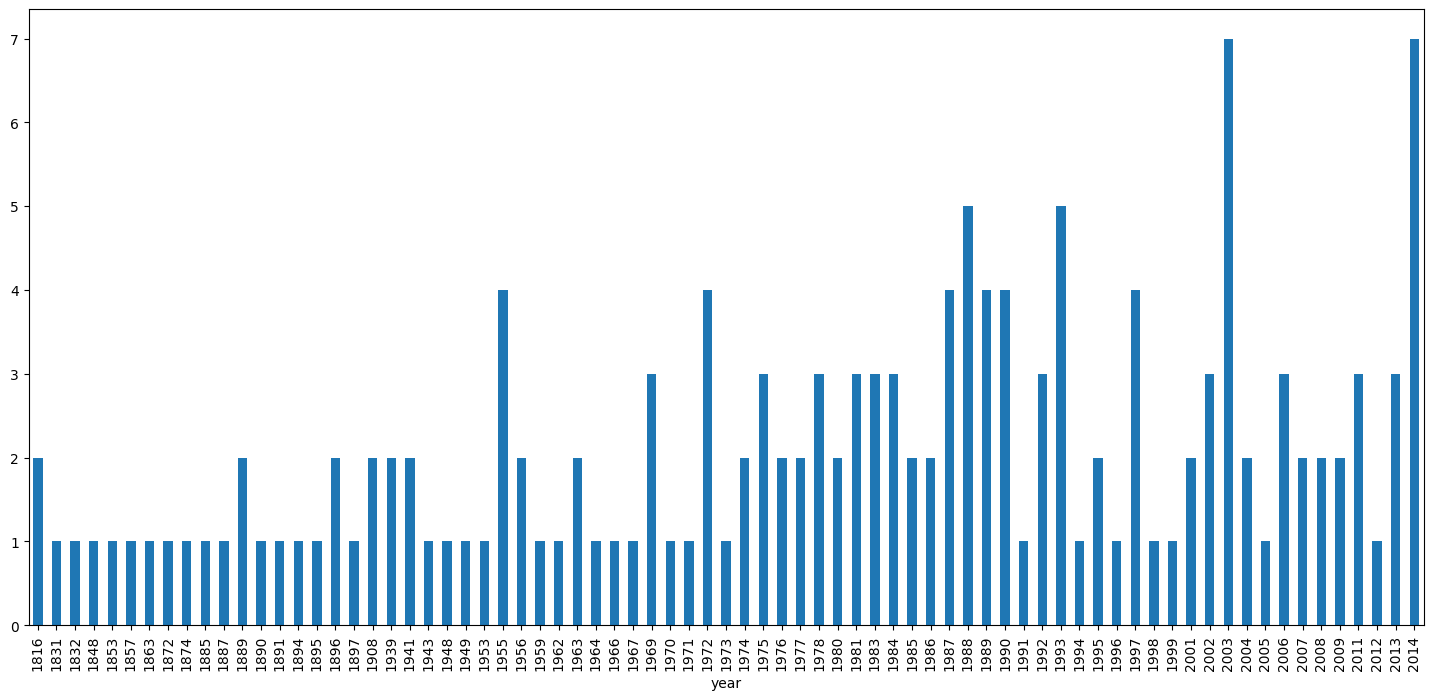

In [9]:
#filter
knotBooksDf = knotDf.query('lang!="en" & translated=="-" & book_type!="самиздат"')
seaThemesList = ['криминалистика', 'морская наука', 'морские узлы', 'строительство',
                 'подводная', 'яхтинг', 'судостроение', 'война', 'этнография']
seaThemesQuery = ' | '.join( ['theme=="{0}"'.format(i) for i in seaThemesList] )
knotBooksDf = knotBooksDf.query(seaThemesQuery)
#remove extra columns
knotBooksDf = knotBooksDf.drop(columns=['theme','book_type','translated','lang'])
#group - knots to sum knots
#group (книга, год) - убраны узлы из книги
knotBooksByYear = knotBooksDf.groupby(['year','sourse']).count()
#book count in year
knotBookCntByYear = knotBooksByYear.groupby(['year']).count() 
#draw plot
knotBookCntByYear.reset_index(inplace=True)
knotBookCntByYear = knotBookCntByYear.rename(columns={'knot_name':'book_count'})
#display(knotBookCntByYear)
#print('knotBookCntByYear cols:', list(knotBookCntByYear.columns))
#в плоте распределение показа ярлыков "x" равномерно в отличие от бара
title = 'кол-во рус. книг о морских узлах по годам'
plot = knotBookCntByYear.plot(title=title,x='year', figsize=(18,8), rot=90, legend=False)
plot.xaxis.set_major_locator(plt.MaxNLocator(30)) #x label cut count
plt.draw()
knotBookCntByYear.plot.bar(x='year', y='book_count', rot=90, figsize=(18,8), legend=False) #неравномерно х

## plot - Mean knot count by year. Ru
## График средн. кол-во узлов в книге по годам ##

<Axes: title={'center': 'средн. кол-во узлов в книгах по годам'}, xlabel='year'>

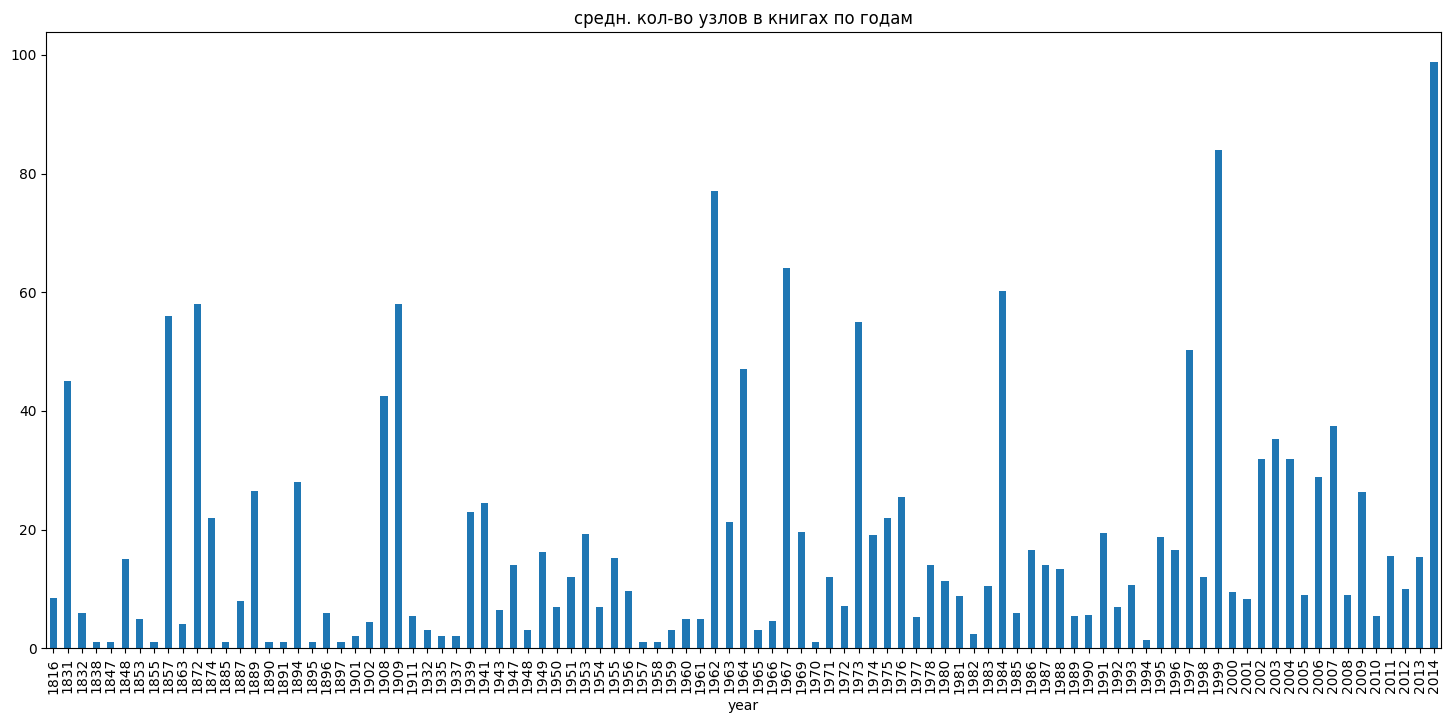

In [10]:
#filter
query = 'lang!="en" & translated=="-" & book_type!="самиздат" '
filteredData = knotDf.query(query)
filteredData = filteredData.filter(['knot_name','sourse','year'])
#display(filteredData.head())
#knot count in every book
knotcount_year_sourceData = filteredData.groupby(['sourse']).agg({
    'knot_name':'count',
    'year':'first',    
})
#display(knotcount_year_sourceData.head())
knotcount_year_sourceData.reset_index(inplace=True) #index to column after groupby
knotcount_year_sourceData = knotcount_year_sourceData.rename(columns={'knot_name':'knot_count'})
knotcount_year_sourceData = knotcount_year_sourceData.sort_values(by=['knot_count'], ascending=False )
#display(knotcount_year_sourceData.head(15))
#show table
#pd.set_option('display.max_rows', 15)
#with pd.option_context('display.max_colwidth', 50):
#    knotcount_year_sourceData = knotcount_year_sourceData.reset_index(drop=True)
#    print(knotcount_year_sourceData.head(15))
#knotcount_year_sourceData.to_csv('knot count in every book.csv', index=False, sep='|')

#knot count in year ('mean' books in same year)
knotcountMean_yearData = knotcount_year_sourceData.groupby('year').agg({
    'knot_count':'mean',
    'year':'first',    
})
#display(knotcountMean_yearData)
#knotcountMean_yearData.reset_index(drop=True, inplace=True)
title = 'средн. кол-во узлов в книгах по годам'
knotcountMean_yearData.plot.bar(x='year', title=title, rot=90, figsize=(18,8), legend=False)

#plot = filteredData.plot(title=title, x='year', figsize=(18,8), rot=90, legend=False)
#plot.xaxis.set_major_locator(plt.MaxNLocator(30)) #x label cut count
#plt.draw()

# first book about only knots. Ru
# Первая книга по узлам
Самый часто используемый источник это Cкрягин — первое издание 1982, второе 1984.
Из-за этого создаётся впечатление, что это самый старый и первый справочник по узлам.
Так оно и есть, остальные только главы имеют про узлы

In [11]:
knotDfGroupedByBook1984 = knotDfGroupedByBook.query('year<1985 & knot_count>15 & lang!="en" & translated=="-" & book_type!="самиздат"')
display(knotDfGroupedByBook1984.sort_values(by=['knot_count','year'], ascending=False).reset_index(drop=True).head(20))

,sourse,knot_count,year,theme,book_type,lang,translated
0,"Скрягин Л. Н. Морские узлы. — 2-е изд. — Москва: Транспорт, 1984.",148,1984,морские узлы,справочник,ru,-
1,"Муравьёв Б.П. Справочник боцмана. — М.: Воениздат, 1984.",91,1984,морская наука,справочник,ru,-
2,"Григорьев В. В., Грязнов В. М. Судовые такелажные работы. Атлас. — 4-е изд. перераб. и доп. — Москва, Транспорт, 1975.",81,1975,морские узлы,справочник,ru,-
3,"Мухин Н.Г. Узлы и петли: Справочно-методическое пособие для экспертов, судей, следователей и оперативных работников. — Ленинград, 1976.",80,1976,криминалистика,справочник,ru,-
4,"Алексеевский Ф.Г. Такелажные работы. — 6-е изд. перераб. и доп. — Москва: Речной транспорт, 1962.",77,1962,морская наука,справочник,ru,-
5,"Малахов З.С., Боровцев Ф.В., Емельянов Н.В., Городенко Б.К. Лопатин А.М., Богоявленский Д.Н., Маклер Я.Н. Морская практика. В 2-х частях. Часть I — Москва: Военно-морское издетельство военно-морского министерства Союза ССР, 1953. — На обл. авт. не указаны.",65,1953,морская наука,справочник,ru,-
6,"Уколов Д.П. Судовой такелажник. — Ленинград: Судостроение, 1967.",64,1967,морская наука,справочник,ru,-
7,"Pierre L. Le Larousse pour tous. vol.2, 1909.",58,1909,None,энциклопедия,fr,-
8,"Федорович 3-й П. Морская практика для Юнгов и Воспитанников Мореходных школ. Часть первая. — Спб.: Морское министерство, 1872.",58,1872,морская наука,справочник,ru,-
9,"Черкасский М. Б. Курс морской практики для учеников строевых квартирмейстеров. — СПб.: Типо-лит. А.Э. Винеке, 1908.",57,1908,морская наука,None,ru,-


# obsolete

In [12]:
#split many rows to cols
##Функции для показа строк разбив их на колонки шоб '...' не видеть и строки нескролить
#разбить на чанки
def chunker(series, chunkSize):
    chunkCnt = int(len(series) / chunkSize)
    chunks = [  series.iloc[i*chunkSize:i*chunkSize+chunkSize] for i in range(0,chunkCnt)   ]
    return chunks
#чанки в колонки. chunks to cols
def seriesToDf(chunks):
    allDf = pd.DataFrame()
    dfChunkList = []
    for i, chunk in enumerate(chunks):
        df = pd.DataFrame(chunk)
        df.reset_index(inplace=True)
        df = df.rename(columns={'index':'year'+str(i), 'year':'bookCnt'+str(i)})
        dfChunkList.append(df)
    return pd.concat(dfChunkList, axis = 1)

In [13]:
#knot book count by year in table sorted by book count. chunked to cols
#кол-во книг в году (сумма узлов со всех книг в году)
series = knotDfGroupedByBook.year.value_counts()
#split into many cols
chunks = chunker(series, 10)
df = seriesToDf(chunks)
display(df)

,year0,bookCnt0,year1,bookCnt1,year2,bookCnt2,year3,bookCnt3,year4,bookCnt4,year5,bookCnt5,year6,bookCnt6,year7,bookCnt7,year8,bookCnt8,year9,bookCnt9
0,2014,10,2009,7,1974,5,1989,4,1995,4,1977,3,1967,2,1832,1,1872,1,1882,1
1,2004,9,1990,7,1987,5,2000,4,1994,3,1896,3,1943,2,1912,1,1944,1,1947,1
2,2003,9,2008,7,1997,5,1978,4,2018,3,1991,3,1954,2,1999,1,1838,1,1964,1
3,1993,9,2011,7,2015,5,1984,4,1966,3,1911,3,1816,2,1847,1,1901,1,1863,1
4,1988,8,1969,6,1976,4,1963,4,1982,3,1971,2,1961,2,1897,1,1885,1,1951,1
5,1972,8,2002,6,1949,4,1956,4,1948,3,1937,2,2021,2,1890,1,1891,1,1855,1
6,2006,8,1975,6,1980,4,2010,4,1985,3,1889,2,1908,2,1848,1,1895,1,1894,1
7,2013,8,1996,6,2016,4,1986,4,1853,3,1939,2,1941,2,1932,1,2019,1,1874,1
8,1955,8,1992,6,1953,4,2001,4,2017,3,2012,2,1902,2,1973,1,1865,1,1965,1
9,2007,7,2005,5,1983,4,1981,4,1950,3,1960,2,1970,1,1917,1,1857,1,1887,1


In [14]:
#add "date" column to dataset. part 1 merge and show not merged

In [16]:
if False:
    knotDf = pd.read_csv(r'Алфавитный указатель морских узлов by hasp v16 - books raw.tsv', sep='\t', skiprows=[0,1]) #skip credintals
    knotDf = knotDf.query('knot_name!="?"')
    #https://docs.google.com/spreadsheets/d/1jFma4TwJf_2_h4Bkw-LB10bKOYxnAPOie1GSIlwNEZU/edit#gid=1551830940
    knotDateDf = pd.read_csv('TEMP - knot add date.tsv', sep='\t', names=['date', 'sourse'])
    display(knotDateDf.head())

    #--merge by source column
    '''
    knotDf = knotDf.query('knot_name!="?"')
    merged = pd.merge(knotDf, knotDateDf, how="left", on="sourse", indicator=True)#display(merged)
    unmerged = merged[merged['_merge']=='left_only'] 
    pd.set_option('display.max_rows', 127)
    res = unmerged.groupby(['sourse']).agg('first').filter(['sourse','year','date','_merge'])#.to_string()
    print(len(res))
    display(res)
    pd.set_option('display.max_rows', 10)
    '''
    #--merge by clear column
    import re
    subChars = '#|\.|—|"|№|:|,|–|-|\s'

    #df["begin"] = df.apply(lambda x: clear(x["begin"]), axis=1)
    knotDf['sourse_clear'] = knotDf.apply(lambda x: re.sub(subChars, "", x['sourse']) , axis=1 )
    knotDateDf['sourse_clear'] = knotDateDf.apply(lambda x: re.sub(subChars, "", x['sourse']), axis=1 )                         
    merged = pd.merge(knotDf, knotDateDf, how="left", on="sourse_clear", indicator=True)
    #display(merged)
    unmerged = merged[merged['_merge']=='left_only'] #filter row left_only
    res = unmerged.groupby(['sourse_clear'], as_index=False).agg('first').filter(['sourse_x','year','date','_merge'])#.to_string()
    print(len(res))
    pd.set_option('display.max_rows', 127)
    pd.set_option('max_colwidth', 400)
    display(res)
    pd.set_option('display.max_rows', 10)

In [ ]:
#add "date" column to dataset. part 2 save

In [ ]:
if False:
    import pandas as pd
    import re
    knotDf2 = pd.read_csv(r'Алфавитный указатель морских узлов by hasp v16 - books raw.tsv', sep='\t', skiprows=[0,1]) #skip credintals
    knotDateDf = pd.read_csv('TEMP - knot add date.tsv', sep='\t', names=['date', 'sourse'])
    '''
    subChars = '#|\.|—|"|№|:|,|–|-|\s'
    knotDf2['sourse_clear'] = knotDf2.apply(lambda x: re.sub(subChars, "", x['sourse']) , axis=1 )
    knotDateDf['sourse_clear'] = knotDateDf.apply(lambda x: re.sub(subChars, "", x['sourse']), axis=1 )                         
    merged = pd.merge(knotDf2, knotDateDf, how="left", on="sourse_clear")
    print('knotDf2', len(knotDf2))
    print('merged',len(merged))
    display(merged)
    #merged.to_csv('datecol.csv',columns=['date','sourse_x'], index=False)
    '''
    print('knotDf2 before', len(knotDf2))
    for index, row in knotDf2.iterrows():
        ogSource = row['sourse']
        query = "sourse=='{0}'".format(ogSource)
        dateRow = knotDateDf.query(query)
        if(len(dateRow)==0):
            if (row.iloc[0]!='?'):
                print(row)
            continue
        #print(query)
        #print(ogSource)
        #display(dateRow)
        #row['date_add'] = dateRow['date']
        #print(dateRow['date'].iloc[[0]]) #
        #print(dateRow.iloc[0]['date'])

        knotDf2.loc[index,'date_add'] = dateRow.iloc[0]['date']
        #break
    print('knotDf2 after', len(knotDf2))
    display(knotDf2)
    #knotDf2.to_csv('datecol.csv',columns=['date_add','sourse'], index=False)
    knotDf2.to_csv('datecol.csv',columns=['date_add'], index=False)

In [ ]:
#add "knot_count" column to dataset for google excel to easy sorting

In [21]:
knotDf2 = knotDf
knotDf2['knot_countTransform'] = knotDf['sourse'].groupby(knotDf['sourse']).transform('count')
display(knotDf2.filter(['sourse', 'knot_countTransform','knot_count']))
#knotDf2.to_excel('new.xlsx')
#knotDf2.to_csv('knotCnt.csv', columns='knot_countTransform')

,sourse,knot_countTransform,knot_count
24,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,196
25,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,196
26,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,196
27,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,196
28,"Шпаковский М. М. Большая энциклопедия узлов. — Москва: АСТ, 2016. — ISBN 978-5-17-093501-7",196,196
...,...,...,...
9939,"Кальман Г.В. Узлы. Техника вязания и применение. Справочник. — ВСВ-Сфинкс, 1997. — ISBN 5-900544-05-2",56,56
9940,"Кальман Г.В. Узлы. Техника вязания и применение. Справочник. — ВСВ-Сфинкс, 1997. — ISBN 5-900544-05-2",56,56
9941,"Кальман Г.В. Узлы. Техника вязания и применение. Справочник. — ВСВ-Сфинкс, 1997. — ISBN 5-900544-05-2",56,56
9942,"Кальман Г.В. Узлы. Техника вязания и применение. Справочник. — ВСВ-Сфинкс, 1997. — ISBN 5-900544-05-2",56,56


In [ ]:
if False:    
    #--RU source list to search in google books
    googleDf = knotDf.filter(['sourse', 'google_books', 'lang'])
    googleDf = googleDf.query('lang=="ru" & google_books.isnull()')
    googleDf = googleDf.filter(['sourse'])
    googleDf = googleDf.groupby(['sourse']).count()
    googleDf.to_csv('source.csv', index=False, sep='|')
    
    #гистограмма думает объектами - col1 bar1 col2 barl_lenght
    knotBookCntByYear.hist(column='year') #, bins=25, figsize=(12,8)